In [1]:
import pandas as pd  
from sklearn.datasets import load_boston
import numpy as np

import os
os.chdir('../../')
print(os.listdir())

['Checkpoint', 'data', 'main_BONN.py', 'OANN', 'README.md', 'run_SQANN.py', 'SQANN', 'TNN']


In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
col_names = boston.columns
print('col_names:',col_names)

col_names: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


c:\users\ericotjoa\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

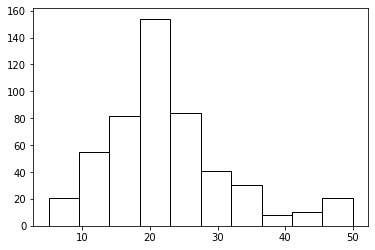

In [3]:
X = boston.to_numpy()
Y = boston_dataset.target
print(X.shape)
print(Y[:10])
import matplotlib.pyplot as plt
plt.figure()
plt.hist(Y, fill=False)

In [4]:
for j in range(len(col_names)):
    x_max, x_min = np.max(X[:,j]), np.min(X[:,j])
    print('max: %-5s, min: %-5s'%(np.round(x_max,3), np.round(x_min,3)), end = '->')
    X[:,j] = (X[:,j]-x_min)/(x_max-x_min)
    x_max, x_min = np.max(X[:,j]), np.min(X[:,j])
    print('  (%-5s, %-5s)'%(np.round(x_max,3), np.round(x_min,3)))

max: 88.976, min: 0.006->  (1.0  , 0.0  )
max: 100.0, min: 0.0  ->  (1.0  , 0.0  )
max: 27.74, min: 0.46 ->  (1.0  , 0.0  )
max: 1.0  , min: 0.0  ->  (1.0  , 0.0  )
max: 0.871, min: 0.385->  (1.0  , 0.0  )
max: 8.78 , min: 3.561->  (1.0  , 0.0  )
max: 100.0, min: 2.9  ->  (1.0  , 0.0  )
max: 12.126, min: 1.13 ->  (1.0  , 0.0  )
max: 24.0 , min: 1.0  ->  (1.0  , 0.0  )
max: 711.0, min: 187.0->  (1.0  , 0.0  )
max: 22.0 , min: 12.6 ->  (1.0  , 0.0  )
max: 396.9, min: 0.32 ->  (1.0  , 0.0  )
max: 37.97, min: 1.73 ->  (1.0  , 0.0  )


In [5]:
n_train = 100 # int(len(X)/2)
X_train, Y_train = X[:n_train,:], Y[:n_train]
X_test, Y_test = X[n_train:,:], Y[n_train:]

In [6]:
MSE = {}
def compute_mse(y_pred,y0):
    return np.mean((y_pred-y0)**2)**0.5
# compute_mse(np.array([1,2,3]),np.array([0,2,5]))

In [7]:
from sklearn.linear_model import LinearRegression, Ridge,  Lasso
def do_regress(regression, X_train, Y_train, MSE, name):
    model = regression.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    if name is not None:
        MSE[name] = compute_mse(Y_pred,Y_test)
    return MSE

print('linear models...')
MSE = do_regress( LinearRegression(), X_train, Y_train, MSE, 'linear')
MSE = do_regress(Ridge(), X_train, Y_train, MSE,'Ridge')
MSE = do_regress(Lasso(), X_train, Y_train, MSE, 'Lasso')

print('\nSupport vector models...')
from sklearn.svm import LinearSVR, NuSVR, SVR
MSE = do_regress(LinearSVR(), X_train, Y_train, MSE,'LinSVR')
MSE = do_regress(NuSVR(), X_train, Y_train, MSE,'NuSVR')
MSE = do_regress(SVR(), X_train, Y_train, MSE,'SVR')

print('\nDecision Tree models...')
from sklearn.tree import DecisionTreeRegressor
MSE = do_regress(DecisionTreeRegressor(random_state=0), X_train, Y_train, MSE,'DecTree')

print('\nKNeighbors models...')
from sklearn.neighbors import KNeighborsRegressor
min_mse,n_min = np.inf,-1
for n in range(2,16+1):
    temp_name = 'KNeighborsRegressor(n_neighbors=%s)'%(str(n))
    dummy = do_regress(KNeighborsRegressor(n_neighbors=n), X_train, Y_train, {}, temp_name)
    this_mse = dummy[temp_name]
    if this_mse<min_mse:
        print(np.round(this_mse,4), 'n:%s'%(str(n)))
        min_mse = this_mse
        n_min = n
MSE['kneigh'] = min_mse

print('\nMLP models...')
from sklearn.neural_network import MLPRegressor
MSE = do_regress(MLPRegressor(hidden_layer_sizes=(64,64),random_state=1, max_iter=12000), X_train, Y_train, MSE, 'MLP')

linear models...

Support vector models...

Decision Tree models...

KNeighbors models...
7.8006 n:2
7.5622 n:3
7.4997 n:4
7.3933 n:5

MLP models...


In [8]:
from OANN.src.models.utils import double_selective_activation
from OANN.src.models.SQANN import SQANN
from OANN.src.utils import simple_evaluation, standard_evaluation

settings = {'init_new':True, 'output_mode':'continuous' }
net = SQANN(**settings)
net.fit_data(X_train,Y_train,verbose=20)

using classic layer setting, inherited from SQANN...
Exiting layer_k_sample_collection() because all data have been used.
Final positions of indices in the layers:
  [1] [0]
  [2] [1, 2, 3, 4, 5, 6, 7, 10, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 58, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 8, 32, 54, 55]


In [9]:
standard_evaluation(X_test, Y_test, net, get_interp_indices=False)
Y_pred = []
for i in range(len(X_test)):
    y, act, ACTIVATION_STATUS, info_ = net.SQANN_propagation(X_test[i,:], ALLOW_INTERPOLATION=True)
    Y_pred.append(y)
MSE['SQANN'] = compute_mse(np.array(Y_pred),Y_test)

 i     Layer  rms error
[0]    L=2         2.5      HIT
[1]    L=2         8.3      HIT
[2]    L=2        16.8      HIT
[3]    L=2         7.3      HIT
[4]    L=2         3.5      HIT
[5]    L=2         3.3      HIT
[6]    L=2         4.7      HIT
[7]    L=2         5.9      HIT
[8]    L=2         1.9      HIT
[9]    L=2         2.3      HIT
[10]   L=2         4.2      HIT
[11]   L=2         4.3      HIT
[12]   L=2         0.1      HIT
[13]   L=2         0.5      HIT
[14]   L=2         4.4      HIT
[15]   L=2         2.5      HIT
[16]   L=2         6.8      HIT
[17]   L=2         5.8      HIT
[18]   L=2         0.5      HIT
[19]   L=2         4.1      HIT
[20]   L=2         3.1      HIT
[21]   L=2        15.1      HIT
[22]   L=2        14.9      HIT
[23]   L=[2, 2]   9.883      INTERPOLATE
[24]   L=2        16.6      HIT
[25]   L=2        14.0      HIT
[26]   L=[2, 2]   11.484      INTERPOLATE
[27]   L=2        19.2      HIT
[28]   L=2        17.4      HIT
[29]   L=2        21.1      H

[332]  L=[2, 2]   11.084      INTERPOLATE
[333]  L=[2, 2]   12.884      INTERPOLATE
[334]  L=[2, 2]   15.484      INTERPOLATE
[335]  L=[2, 2]   13.784      INTERPOLATE
[336]  L=[2, 2]   17.584      INTERPOLATE
[337]  L=[2, 2]   18.484      INTERPOLATE
[338]  L=[2, 2]   18.784      INTERPOLATE
[339]  L=[2, 2]   14.384      INTERPOLATE
[340]  L=[2, 2]   16.684      INTERPOLATE
[341]  L=[2, 2]   10.084      INTERPOLATE
[342]  L=[2, 2]   8.784      INTERPOLATE
[343]  L=[2, 2]   11.784      INTERPOLATE
[344]  L=[2, 2]   16.384      INTERPOLATE
[345]  L=[2, 2]   15.384      INTERPOLATE
[346]  L=[2, 2]   12.284      INTERPOLATE
[347]  L=[2, 2]   14.584      INTERPOLATE
[348]  L=[2, 2]   13.084      INTERPOLATE
[349]  L=[2, 2]   14.184      INTERPOLATE
[350]  L=[2, 2]   13.784      INTERPOLATE
[351]  L=[2, 2]   11.984      INTERPOLATE
[352]  L=[2, 2]   11.084      INTERPOLATE
[353]  L=[2, 2]   9.384      INTERPOLATE
[354]  L=[2, 2]   12.284      INTERPOLATE
[355]  L=[2, 2]   13.084      INTERP

In [10]:
for model_name, mse_score in MSE.items():
    print('%-24s : %s'%(str(model_name),str(np.round( mse_score,4))))

linear                   : 36.4449
Ridge                    : 7.9896
Lasso                    : 9.8339
LinSVR                   : 8.3585
NuSVR                    : 8.8331
SVR                      : 8.7116
DecTree                  : 7.3563
kneigh                   : 7.3933
MLP                      : 12.7684
SQANN                    : 12.6459


In [11]:
from SQANN.src.utils import ood_searcher

def integrate_ood_data(X_train, Y_train, X_test,Y_test,net, error_th=5):
    print('error threshold:', error_th)
    OOD_INDICES_COLLECTION = ood_searcher(X_test,Y_test,net , len(X_test),error_th=error_th)

    X_train_new = list(X_train)
    Y_train_new = list(Y_train)

    for oi in OOD_INDICES_COLLECTION:
        X_train_new.append(X_test[oi,:])
        Y_train_new.append(Y_test[oi])
    X_train_new = np.array(X_train_new)
    Y_train_new = np.array(Y_train_new)

    # print(OOD_INDICES_COLLECTION)
    print('n total:', len(X))
    print('n original training:', len(X_train))
    print('n integrated:',len(OOD_INDICES_COLLECTION))
    print('n training new:', len(X_train_new))
    print('n test:', len(X_test))
    print('new training fraction:',np.round(len(X_train_new)/len(X),3))

    MSE_new = {}
    # print('linear models...')
    MSE_new = do_regress( LinearRegression(), X_train_new, Y_train_new, MSE_new, 'linear')
    MSE_new = do_regress(Ridge(), X_train_new, Y_train_new, MSE_new,'Ridge')
    MSE_new = do_regress(Lasso(), X_train_new, Y_train_new, MSE_new, 'Lasso')

    # print('\nSupport vector models...')
    from sklearn.svm import LinearSVR, NuSVR, SVR
    MSE_new = do_regress(LinearSVR(), X_train_new, Y_train_new, MSE_new,'LinSVR')
    MSE_new = do_regress(NuSVR(), X_train_new, Y_train_new, MSE_new,'NuSVR')
    MSE_new = do_regress(SVR(), X_train_new, Y_train_new, MSE_new,'SVR')

    # print('\nDecision Tree models...')
    from sklearn.tree import DecisionTreeRegressor
    MSE_new = do_regress(DecisionTreeRegressor(random_state=0), X_train_new, Y_train_new, MSE_new,'DecTree')

    # print('\nKNeighbors models...')
    from sklearn.neighbors import KNeighborsRegressor
    min_mse_new,n_min = np.inf,-1
    for n in range(2,16+1):
        temp_name = 'KNeighborsRegressor(n_neighbors=%s)'%(str(n))
        dummy = do_regress(KNeighborsRegressor(n_neighbors=n), X_train_new, Y_train_new, {}, temp_name)
        this_mse = dummy[temp_name]
        if this_mse<min_mse_new:
            # print(np.round(this_mse,4), 'n:%s'%(str(n)))
            min_mse_new = this_mse
            n_min = n
    MSE_new['kneigh'] = min_mse_new

    # print('\nMLP models...')
    from sklearn.neural_network import MLPRegressor
    MSE_new = do_regress(MLPRegressor(hidden_layer_sizes=(64,64),random_state=1, max_iter=12000), X_train_new, Y_train_new, MSE_new, 'MLP')

    settings = {'init_new':True, 'output_mode':'continuous' }
    net_new = SQANN(**settings)
    net_new.fit_data(X_train_new,Y_train_new,verbose=0)

    # standard_evaluation(X_test, Y_test, net_new, get_interp_indices=False)
    Y_pred_new = []
    for i in range(len(X_test)):
        y1, act1, ACTIVATION_STATUS1, info1_ = net.SQANN_propagation(X_test[i,:], ALLOW_INTERPOLATION=True)
        y2, act2, ACTIVATION_STATUS2, info2_ = net_new.SQANN_propagation(X_test[i,:], ALLOW_INTERPOLATION=True)

        y = y1 if np.max(act1)>np.max(act2) else y2
        Y_pred_new.append(y)
    MSE_new['SQANN'] = compute_mse(np.array(Y_pred_new),Y_test)
    return MSE_new

In [12]:
MSE_new1 = integrate_ood_data(X_train, Y_train, X_test,Y_test,net, error_th=5)
print()
MSE_new2 = integrate_ood_data(X_train, Y_train, X_test,Y_test,net, error_th=2)

error threshold: 5
n total: 506
n original training: 100
n integrated: 290
n training new: 390
n test: 406
new training fraction: 0.771
using classic layer setting, inherited from SQANN...

error threshold: 2
n total: 506
n original training: 100
n integrated: 349
n training new: 449
n test: 406
new training fraction: 0.887
using classic layer setting, inherited from SQANN...


In [13]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

results = {}
for model_name in MSE:
    results[model_name] = [MSE[model_name],MSE_new1[model_name],MSE_new2[model_name]]
df = pd.DataFrame(results)
df.index = ['orig.','eth:5','eth:2'] # eth: error threshold
print(df.round(3))

       linear  Ridge  Lasso  LinSVR  NuSVR    SVR  DecTree  kneigh     MLP   SQANN
orig.  36.445  7.990  9.834   8.358  8.833  8.712    7.356   7.393  12.768  12.646
eth:5   4.989  5.023  7.846   5.984  6.288  6.026    3.122   3.054   2.721   2.604
eth:2   4.977  5.014  8.200   5.916  6.114  5.873    1.429   2.785   2.647   1.270
